# Jason Samuel Suwito

## Research question/interests

#### UPDATED: To what extent does the correlation exist between BMI, Health Care Cost, and Work Hours per week?
For the first correlation (To what extent does BMI affect Health Care Cost?), I am planning to create a scatter plot with the x-axis representing the BMI and y-axis representing the health care cost. For the second correlation (To what extent does Work Hours per week affect BMI?), I am also planning to create a scatter plot with the x-axis representing the Income and the y-axis representing the BMI. For each of the relationships, I will analyze the correlation coefficient value to see the level of correlation between the independent and dependent variables. A high correlation coefficient will indicate that there is a strong relationship between the independent and dependent variables while a low correlation coefficient value will indicate that the relationship is weak. 

#### What age group has the worst BMI compared to other age groups? 
For this question, I will create a bar graph with the x-axis representing the age groups and the y-axis representing BMI. To preserve the proportionality of the graph, the age groups will be divided into equal intervals (i.e. interval of 3 years, 10-13, 13-16, 16-19, 20-23, and so on). The determination of the intervals will be based on research of scientific journals. The age group with the lowest bar will be determined to be the age group that has the worst BMI.

## Data Import

In [65]:
import pandas as pd
import seaborn as sns

In [55]:
healthcost = pd.read_csv("../data/raw/medical_expense.csv")

In [56]:
income = pd.read_csv("../data/raw/adult_income.csv")

### RQ1: To what extent does the correlation exist between BMI, Health Care Cost, and Work Hours per week?

In [64]:
health_filtered = healthcost.drop(['sex','children', 'smoker', 'region'], axis = 1)
health_filtered.dropna()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


In [58]:
income_filtered = income.drop(['workclass', 'fnlwgt', 'education', 'education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','native.country', 'income'], axis = 1)
income_filtered.dropna()

,age,hours.per.week
0,90,40
1,82,18
2,66,40
3,54,40
4,41,40
...,...,...
32556,22,40
32557,27,38
32558,40,40
32559,58,40


In [59]:
health_filtered.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [49]:
income_filtered.describe()

,age,hours.per.week
count,32561.000000,32561.000000
mean,38.581647,40.437456
std,13.640433,12.347429
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


In [73]:
healthByAge = health_filtered.groupby(health_filtered['age'], as_index=False).mean()
healthByAge

,age,bmi,charges
0,18,31.326159,7086.217556
1,19,28.596912,9747.909335
2,20,30.632759,10159.697736
3,21,28.185714,4730.464330
4,22,31.087679,10012.932802
5,23,31.454464,12419.820040
6,24,29.142679,10648.015962
7,25,29.693929,9838.365311
8,26,29.428929,6133.825309
9,27,29.333571,12184.701721


In [74]:
hoursByAge = income_filtered.groupby(income_filtered['age'], as_index=False).mean()
hoursByAge

,age,hours.per.week
0,17,21.367089
1,18,25.912727
2,19,30.678371
3,20,32.280212
4,21,34.034722
...,...,...
68,85,29.333333
69,86,40.000000
70,87,2.000000
71,88,40.000000


In [106]:
RQ1 = pd.merge(healthByAge, hoursByAge, how='inner', on='age')
RQ1

,age,bmi,charges,hours.per.week
0,18,31.326159,7086.217556,25.912727
1,19,28.596912,9747.909335,30.678371
2,20,30.632759,10159.697736,32.280212
3,21,28.185714,4730.464330,34.034722
4,22,31.087679,10012.932802,35.171242
5,23,31.454464,12419.820040,36.718358
6,24,29.142679,10648.015962,39.088972
7,25,29.693929,9838.365311,40.007134
8,26,29.428929,6133.825309,41.064968
9,27,29.333571,12184.701721,42.039521


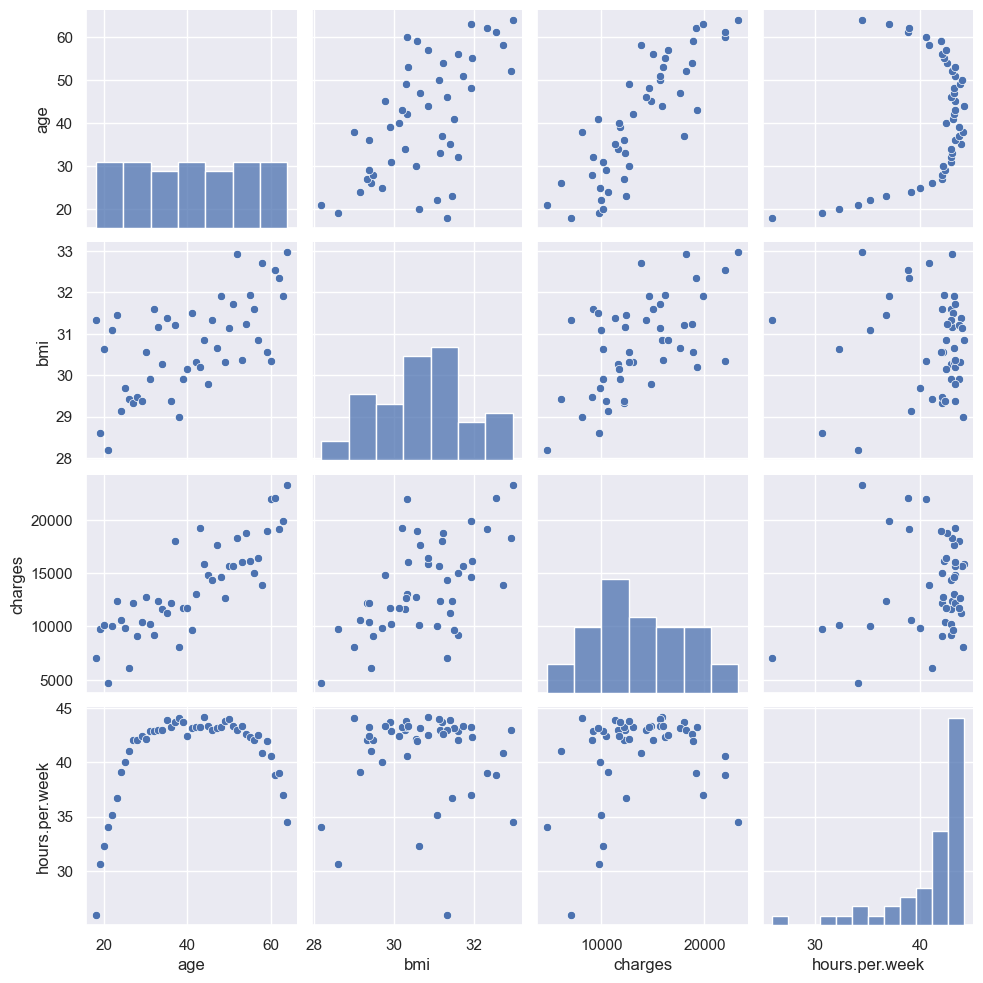

In [107]:
sns.pairplot(RQ1)

### RQ2: What age group has the worst BMI compared to other age groups?

In [76]:
health_filtered = healthcost.drop(['sex','children', 'smoker', 'region', 'charges'], axis = 1)
health_filtered.dropna()

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


In [85]:
BMIByAge = health_filtered.groupby(health_filtered['age'], as_index=False).mean()
BMIByAge

,age,bmi
0,18,31.326159
1,19,28.596912
2,20,30.632759
3,21,28.185714
4,22,31.087679
5,23,31.454464
6,24,29.142679
7,25,29.693929
8,26,29.428929
9,27,29.333571


[(25.0, 35.0)]

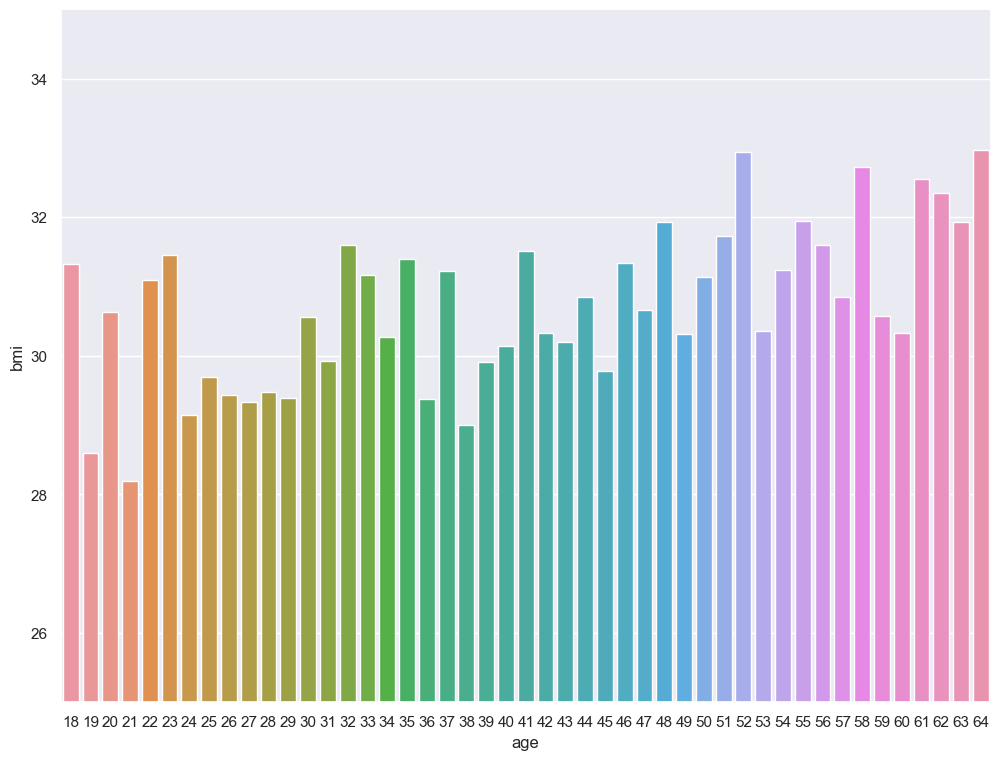

In [104]:
sns.set(rc={'figure.figsize':(12,9)})
sns.barplot(data = BMIByAge, x='age', y='bmi').set(ylim=(25, 35))